In [2]:
#Import analysis libraries
import pandas as pd
import numpy as np

In [3]:
#Reading the data
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
#Investigating the data
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [5]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
#checking the shap of the data
boston_df.shape

(506, 14)

In [36]:
#Immport visualization libraries
import matplotlib.pyplot as pyplot
import seaborn as sns

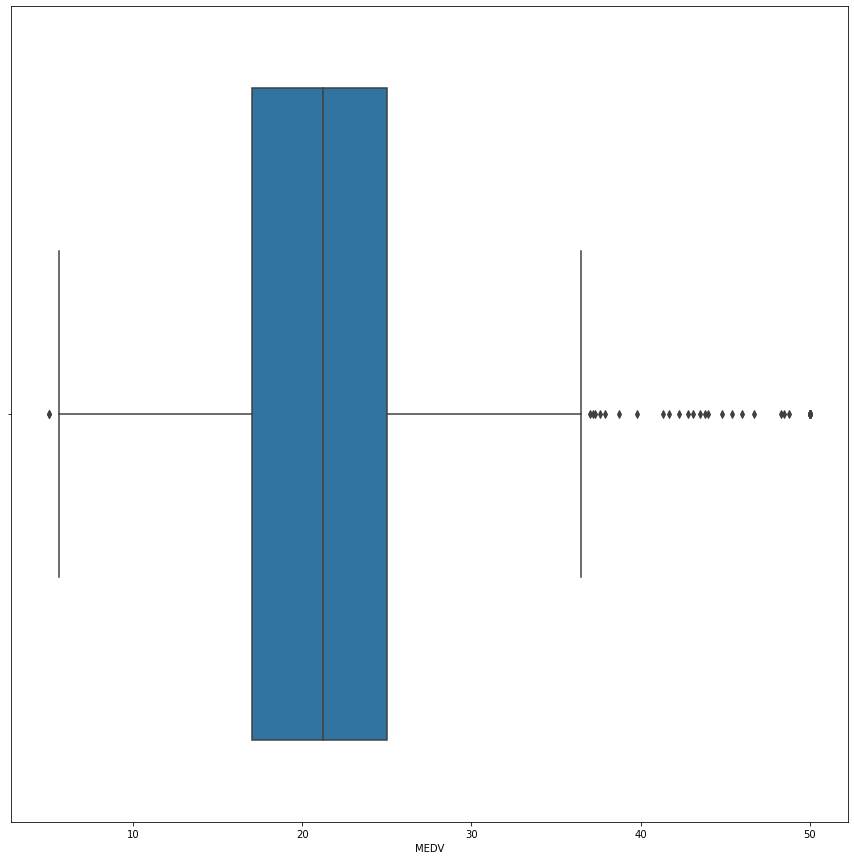

In [26]:
pyplot.figure(figsize=(15,15))
sns.boxplot(boston_df['MEDV'])

The Boxplot shown here corresponds to Median value of owner-occupied homes in $1000's and we can see that there are various outliers below the first quartile. The Median as per the BoxPlot is shown in the plot as approximately 22.

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


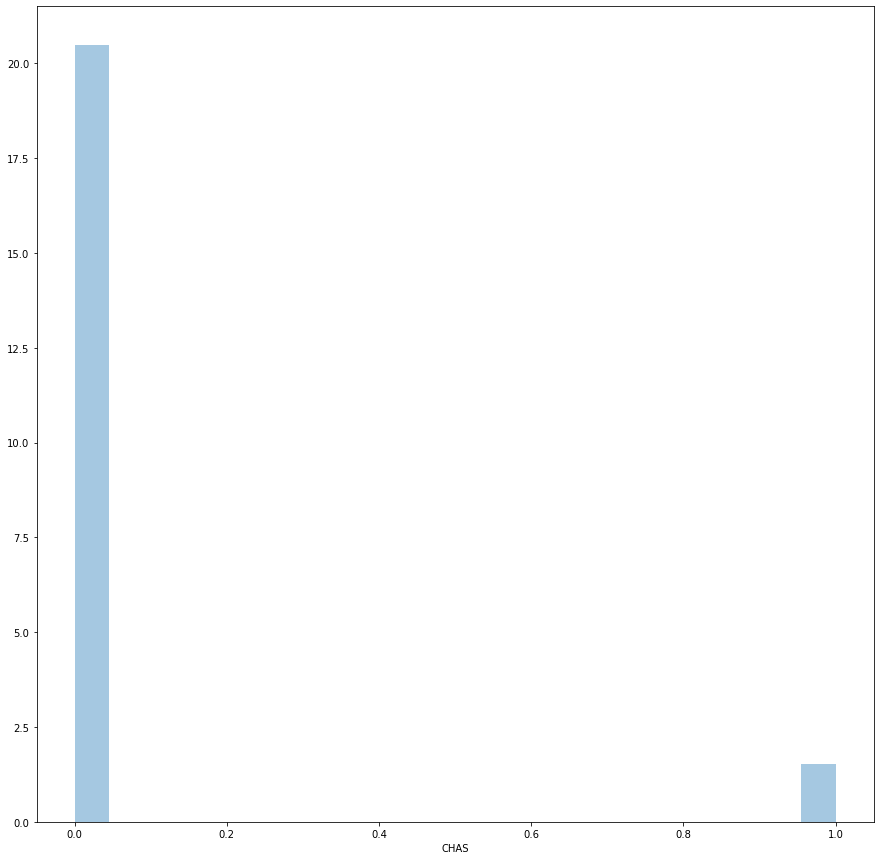

In [41]:
pyplot.figure(figsize=(15,15))
sns.distplot(boston_df['CHAS'])
pyplot.show()

The Histogram shows the Frequency Distribution for Charles River dummy variable where (1 if tract bounds river; 0 otherwise)

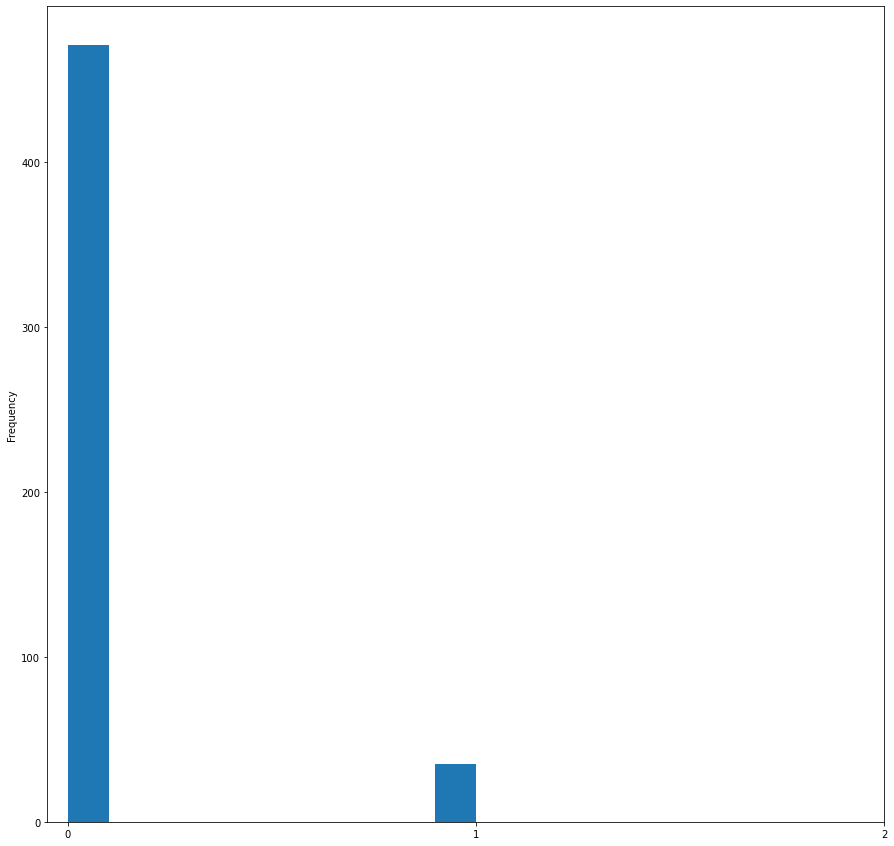

In [28]:
pyplot.figure(figsize=(15,15))
boston_df['CHAS'].plot.hist()
pyplot.xticks(np.arange(3))
pyplot.show()

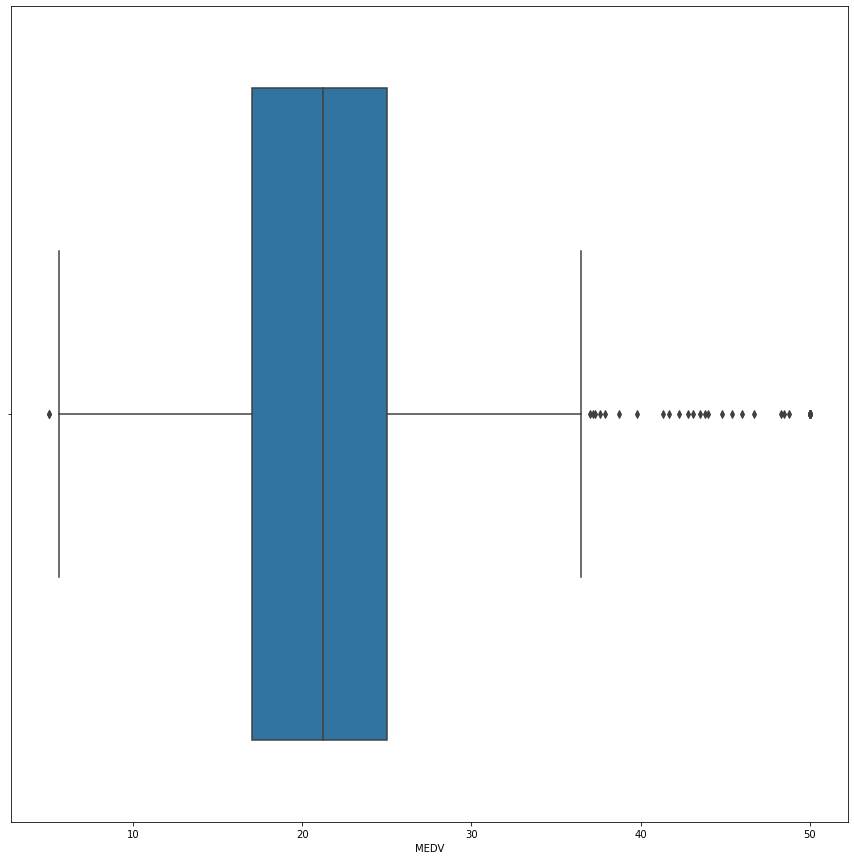

In [29]:
pyplot.figure(figsize=(15,15))
sns.boxplot(boston_df['MEDV'])

In [14]:
# Discretize the AGE column into three groups for analysis.
df_test=pd.DataFrame()
df_test['MED']= boston_df['MEDV']
df_test['AGE_O']= boston_df['AGE']
df_test['Cutting']= pd.cut(df_test['AGE_O'], 3, labels=['35 years and younger', 'between 35 and 70 years','70 years and older'])
df_test

,MED,AGE_O,Cutting
0,24.0,65.2,between 35 and 70 years
1,21.6,78.9,70 years and older
2,34.7,61.1,between 35 and 70 years
3,33.4,45.8,between 35 and 70 years
4,36.2,54.2,between 35 and 70 years
...,...,...,...
501,22.4,69.1,70 years and older
502,20.6,76.7,70 years and older
503,23.9,91.0,70 years and older
504,22.0,89.3,70 years and older


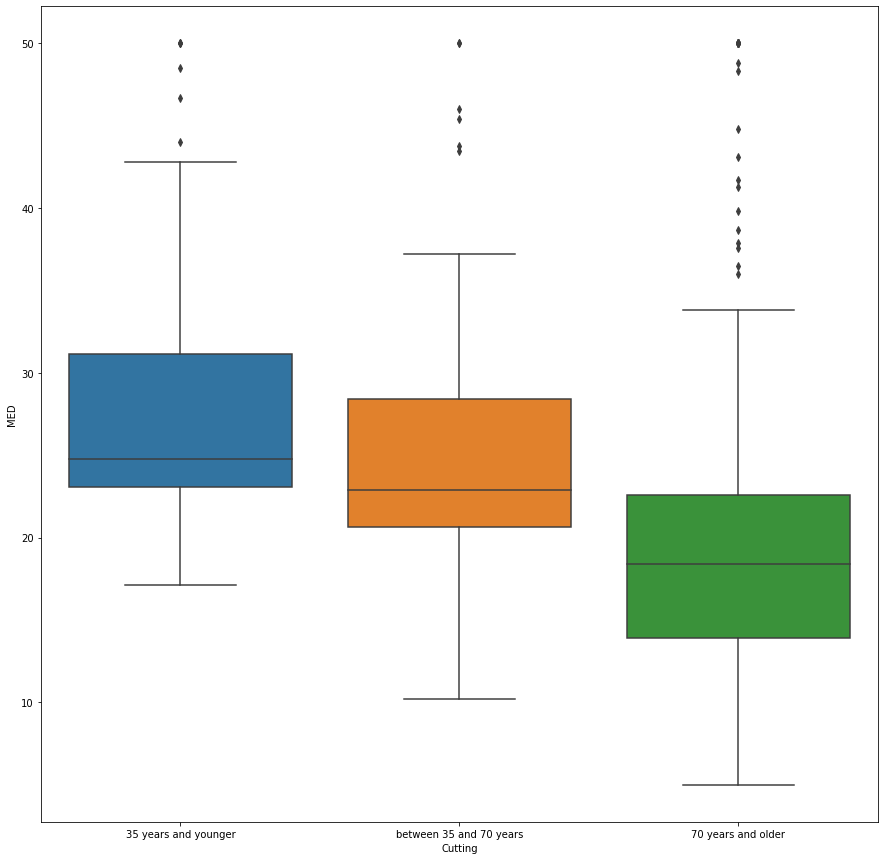

In [17]:
# Boxplot for the Discretize the AGE column into three groups for analysis.
pyplot.figure(figsize=(15,15))
sns.boxplot(y='MED', x='Cutting', data=df_test)

The Boxplot corresponds to the various groups in the AGE column and there are three groups which are 35 years and younger, Between 35 and 70 years and 70 years and older. The Median for the group "35 years and younger" is approximately 25, for "70 years and older" the Median is approximately 19 and for "Between 35 and 70 years" group the Median is approximately 22.

<Figure size 1440x1440 with 0 Axes>

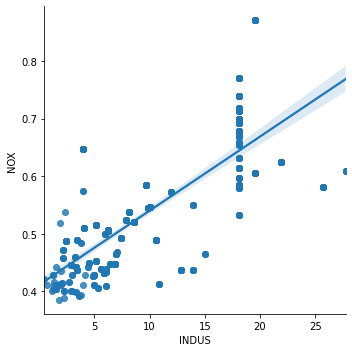

In [25]:
# ScatterPlot for correlation between the INDUS and NOX column.
pyplot.figure(figsize=(20,20))
sns.lmplot(data=boston_df, y='NOX', x='INDUS')
pyplot.show()

The Scatter Plot shows that there is a high correlation or positive correlation between the Nitric Oxides concentration (parts per 10 million) and Proportion of non-retail business acres per town as there is a near linear relationship between both of them.

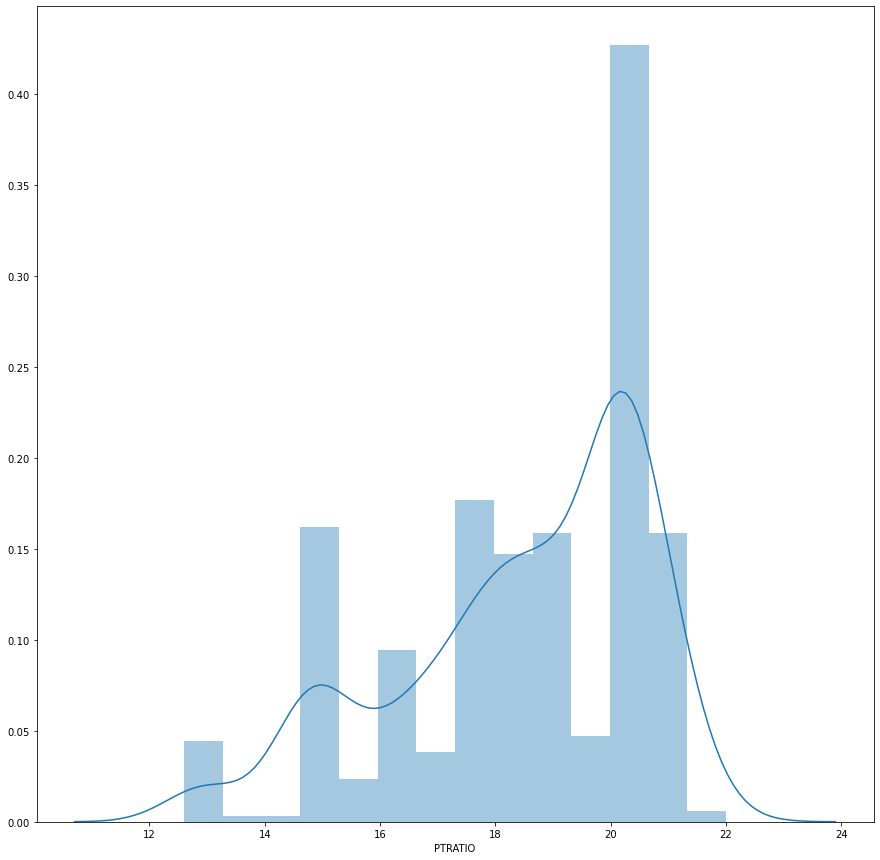

In [23]:
# Display a Histogram for the PTRATIO column.
pyplot.figure(figsize=(15,15))
sns.distplot(boston_df['PTRATIO'])
pyplot.show()

The Histogram mentioned above corresponds to the Frequency Distribution of Pupil-Teacher ratio by town. The highest corresponds to the 20 - 22 bin group. We can also see that the distribution is skewed to the left as the tail of the histogram is towards the 12 on the x-axis. This is called as the Negative-skewed Distribution.

T-Test: Using the Boston Housing Data We need to check Is there a significant difference in median value of houses bounded by the Charles river or not?
ASSUMPTIONS -

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

One independent, categorical variable with two levels or group
One dependent continuous variable
Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
The dependent variable must follow a normal distribution
Assumption of homogeneity of variance
State the hypothesis

H0:µ1=µ2  ("there is no difference in median value of houses bounded by the Charles river")

H1:µ1≠µ2  ("there is a difference in median value of houses bounded by the Charles river")

We can use the Levene's Test in Python to check test significance

In [43]:
import scipy.stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [44]:
scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean')

LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

In [45]:
#Use the ttest_ind from the scipy_stats library

scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

CONCLUSION: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in in median value of houses bounded by the Charles river

ANOVA: Using the Boston Housing data set, Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
First, we group the data into categories as the one-way ANOVA can't work with continuous variable.

35 years and younger

Between 35 and 70 years

70 years and older

State the hypothesis

H0:µ1=µ2=µ3  (the three population means are equal)

H1:  At least one of the means differ

Test for equality of variance

In [48]:
scipy.stats.levene(df_test[df_test['Cutting'] == '35 and younger']['MED'],
                   df_test[df_test['Cutting'] == 'Between 35 and 70']['MED'], 
                   df_test[df_test['Cutting'] == '70 and older']['MED'], 
                   center='mean')

LeveneResult(statistic=nan, pvalue=nan)

In [49]:
thirtyfive_lower = df_test[df_test['Cutting'] == '35 and younger']['MED']

thirtyfive_seventy = df_test[df_test['Cutting'] == 'Between 35 and 70']['MED']

seventy_older = df_test[df_test['Cutting'] == '70 and older']['MED']

In [50]:
scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

CONCLUSION: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

Correlation: Using the Boston Housing dataset, Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
State the hypothesis:

H0:  There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
    
H1:  There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [51]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.763651446920915, 7.913361061239593e-98)

CONCLUSION: Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

Regression with T-test: Using the Boston Housing data set, What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?
We will state the null hypothesis:

H0:β1  = 0 (There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)
    
H1:β1  is not equal to 0 (There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)

In [52]:
## X is the input variables (or independent variables)
X = boston_df['DIS']

## y is the target/dependent variable
y = boston_df['MEDV']

## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           1.21e-08
Time:                        23:51:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

CONCLUSION: Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. The coefficient is positive 0.0572 which also signifies that the impact increases by 0.0572 when there is an additional weighted distance to the five Boston employment centres .